# Case Study on ANOVA
## XYZ Company has offices in four different zones. The company wishes to investigate the following :

1. The mean sales generated by each zone.
2. Total sales generated by all the zones for each month.
3. Check whether all the zones generate the same amount of sales.
   Help the company to carry out their study with the help of data provided.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Sadiya\Downloads\Sales_data_zone_wise.csv")

In [3]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


###  The mean sales generated by each zone.

In [5]:
data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [5]:
df1=data.mean()
df1=pd.DataFrame(df1)
df1

,0
Zone - A,1.540493e+06
Zone - B,1.755560e+06
Zone - C,1.772871e+06
Zone - D,1.842927e+06


### Insights
1. the mean sale generated by zoneA is 1.540493e+06
2. the mean sale generated by  zoneB is  1.755560e+06
3. tne mean sale generated by  zone C is 1.772871e+06
4. the mean sale generated by zone D is 1.842927e+06
5. zone D has maximum meansales then comes A,then B,the least mean sale is generated by zone A

### Total sales generated by all the zones for each month.

In [8]:
df=pd.DataFrame(data)
df["total sales"]=df["Zone - A"] + df["Zone - B"] + df["Zone - C"] + df["Zone - D"]
df

,Month,Zone - A,Zone - B,Zone - C,Zone - D,total sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


In [10]:
data2=df.sort_values(by="total sales",ascending=False).head(10)
data2

,Month,Zone - A,Zone - B,Zone - C,Zone - D,total sales
3,Month - 4,1871571,1759617,2290580,2252681,8174449
7,Month - 8,1625696,1665534,2161754,2363315,7816299
23,Month - 24,1880820,1752873,2098463,2052591,7784747
21,Month - 22,1481619,1527574,2255729,2295079,7560001
27,Month - 28,1616640,1547991,2128022,2178267,7470920
20,Month - 21,1570152,2013615,1540016,2265814,7389597
6,Month - 7,1820196,1992031,1786826,1688055,7287108
13,Month - 14,1821799,1844081,1617376,1872259,7155515
1,Month - 2,1238428,1707421,2212113,1994341,7152303
5,Month - 6,1534390,1573128,1751825,2292044,7151387


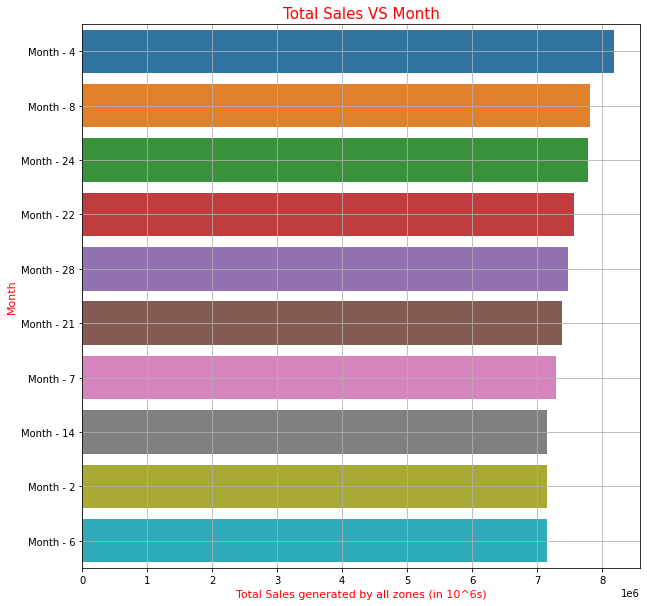

In [15]:
plt.figure(figsize=(10,10))
sns.barplot(y='Month', 
            x="total sales", 
            data=data2, 
            order=data2.sort_values('total sales',ascending = False).Month)
plt.title('Total Sales VS Month',c='r',fontsize=15)
plt.ylabel('Month',c='r',fontsize=11,rotation=90)
plt.xlabel('Total Sales generated by all zones (in 10^6s)',c='r',fontsize=11)
plt.grid()
plt.show()

In [16]:
data3=df.sort_values(by="total sales",ascending=True).head(10)
data3

,Month,Zone - A,Zone - B,Zone - C,Zone - D,total sales
12,Month - 13,1254939,1588473,1348629,1733383,5925424
14,Month - 15,1128185,1804613,1767047,1234311,5934156
4,Month - 5,1244922,1606010,1818334,1326062,5995328
24,Month - 25,1256333,1622671,1521792,1695122,6095918
11,Month - 12,1537539,1875658,1237722,1460165,6111084
26,Month - 27,1384426,1983163,1611169,1289160,6267918
2,Month - 3,1860771,2091194,1282374,1241600,6475939
15,Month - 16,1491534,1542053,1882159,1590913,6506659
25,Month - 26,1422853,1715465,1853636,1520406,6512360
22,Month - 23,1887694,1992155,1348387,1459683,6687919


### insights
1. month 4 has maximum sales
2. month 13 has minimum sales.

### Check whether all the zones generate the same amount of sales.

Null Hypothesis (H0): all the zones generate the same amount of sales.

Alternate Hypothesis (H1): all the zones generate the different amount of sales.

Significance level,α= 0.05

In [17]:
from scipy.stats import f_oneway
f_oneway(df["Zone - A"],df["Zone - B"],df["Zone - C"],df["Zone - D"])

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

In [18]:
stats.f.ppf(1-0.05,3,28)

2.9466852660172655

In [15]:
pval=0.0011827601694503335
if pval<0.05:
    print("Reject H0")
if pval>0.05:
    print("accept H0")

Reject H0


### Insights
P-Value (0.0012) < 0.05, which shows that we can reject the null hypothesis and supports the alternative hypothesissince All zones generate different amount of sales.